<a href="https://colab.research.google.com/github/Narapuspitasari/narapuspita/blob/main/decision_tree_classifier_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import Libraries

In [796]:
import numpy as np  # Digunakan untuk operasi numerik.
import pandas as pd  # Digunakan untuk manipulasi dan analisis data.
import plotly.express as px  # Digunakan untuk visualisasi data dalam bentuk grafik.
import seaborn as sns #Digunakan untuk visualisasi data dalam bentuk grafik.
import matplotlib.pyplot as plt #Digunakan untuk visualisasi data dalam bentuk grafik.

**DATA UNDERSTANDING**


---



 Membaca Dataset

In [797]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [798]:
#Menampilkan Tipe Data
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**PREPROCESSING**

In [799]:
#Mengubah tipe data kolom age menjadi int64.
df['age'] = df['age'].astype('int64')
df

id  gender  age  hypertension  heart_disease ever_married  \
0      9046    Male   67             0              1          Yes   
1     51676  Female   61             0              0          Yes   
2     31112    Male   80             0              1          Yes   
3     60182  Female   49             0              0          Yes   
4      1665  Female   79             1              0          Yes   
...     ...     ...  ...           ...            ...          ...   
5105  18234  Female   80             1              0          Yes   
5106  44873  Female   81             0              0          Yes   
5107  19723  Female   35             0              0          Yes   
5108  37544    Male   51             0              0          Yes   
5109  44679  Female   44             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [800]:
#Mengecek nilai yang hilang dalam DataFrame.
df.isna()

id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  avg_glucose_level    bmi  smoking_status  \
0         False           False              False  False           False   
1         False           False              False   True           False   
2         False           False              False  False           False   
3         False           False              False  False           False   
4         False           False              False  False           False   
...         ...             ...                ...    ...             ...   
5105      False           False              False   True           False   
5106      False           False              False  False           False   
5107      False           False              False  False           False   
5108      False           False              False  False           False   
5109      False           False              False  False           False   

      stroke  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
5105   False  
5106   False  
5107   False  
5108   False  
5109   False  

[5110 rows x 12 columns]

In [801]:
#Menghitung jumlah nilai yang hilang per kolom.
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [802]:
# Menampilkan informasi ringkas tentang DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [803]:
# Menghitung jumlah nilai unik per kolom.
df.nunique()

id                   5110
gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [804]:
# Menampilkan 60 baris pertama dari DataFrame.
df.head(60)

id  gender  age  hypertension  heart_disease ever_married  \
0    9046    Male   67             0              1          Yes   
1   51676  Female   61             0              0          Yes   
2   31112    Male   80             0              1          Yes   
3   60182  Female   49             0              0          Yes   
4    1665  Female   79             1              0          Yes   
5   56669    Male   81             0              0          Yes   
6   53882    Male   74             1              1          Yes   
7   10434  Female   69             0              0           No   
8   27419  Female   59             0              0          Yes   
9   60491  Female   78             0              0          Yes   
10  12109  Female   81             1              0          Yes   
11  12095  Female   61             0              1          Yes   
12  12175  Female   54             0              0          Yes   
13   8213    Male   78             0              1          Yes   
14   5317  Female   79             0              1          Yes   
15  58202  Female   50             1              0          Yes   
16  56112    Male   64             0              1          Yes   
17  34120    Male   75             1              0          Yes   
18  27458  Female   60             0              0           No   
19  25226    Male   57             0              1           No   
20  70630  Female   71             0              0          Yes   
21  13861  Female   52             1              0          Yes   
22  68794  Female   79             0              0          Yes   
23  64778    Male   82             0              1          Yes   
24   4219    Male   71             0              0          Yes   
25  70822    Male   80             0              0          Yes   
26  38047  Female   65             0              0          Yes   
27  61843    Male   58             0              0          Yes   
28  54827    Male   69             0              1          Yes   
29  69160    Male   59             0              0          Yes   
30  43717    Male   57             1              0          Yes   
31  33879    Male   42             0              0          Yes   
32  39373  Female   82             1              0          Yes   
33  54401    Male   80             0              1          Yes   
34  14248    Male   48             0              0           No   
35    712  Female   82             1              1           No   
36  47269    Male   74             0              0          Yes   
37  24977  Female   72             1              0          Yes   
38  47306    Male   58             0              0           No   
39  62602  Female   49             0              0          Yes   
40   4651    Male   78             0              0          Yes   
41   1261    Male   54             0              0          Yes   
42  61960    Male   82             0              1          Yes   
43   1845  Female   63             0              0          Yes   
44   7937    Male   60             1              0          Yes   
45  19824    Male   76             1              0          Yes   
46  37937  Female   75             0              1           No   
47  47472  Female   58             0              0          Yes   
48  35626    Male   81             0              0          Yes   
49  36338  Female   39             1              0          Yes   
50  18587  Female   76             0              0           No   
51  15102    Male   78             1              0          Yes   
52  59190  Female   79             0              1          Yes   
53  47167  Female   77             1              0          Yes   
54   8752  Female   63             0              0          Yes   
55  25831    Male   63             0              1          Yes   
56  38829  Female   82             0              0          Yes   
57  66400    Male   78             0              0          Ye

Menampilkan nilai unik dari kolom gender, work_type, dan smoking_status

In [805]:
#
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [806]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [807]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Mengisi Nilai yang Hilang dan Kategorisasi Data

In [808]:
#Mengisi nilai yang hilang di kolom bmi dengan rata-rata bmi yang dibulatkan ke satu desimal.
df['bmi'] =  df['bmi'].fillna(round(df['bmi'].mean(),1))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [809]:
df

id  gender  age  hypertension  heart_disease ever_married  \
0      9046    Male   67             0              1          Yes   
1     51676  Female   61             0              0          Yes   
2     31112    Male   80             0              1          Yes   
3     60182  Female   49             0              0          Yes   
4      1665  Female   79             1              0          Yes   
...     ...     ...  ...           ...            ...          ...   
5105  18234  Female   80             1              0          Yes   
5106  44873  Female   81             0              0          Yes   
5107  19723  Female   35             0              0          Yes   
5108  37544    Male   51             0              0          Yes   
5109  44679  Female   44             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.9     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.9     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

**Membuat kolom kategori berdasarkan rentang nilai untuk age, avg_glucose_level, dan bmi.**

In [810]:
df['age_cat'] = pd.cut(df['age'], bins = [0,12,18,40,60,200], labels=['Anak-anak','Remaja', 'Dewasa Muda', 'Dewasa Tua', 'lanjut'])

df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,70,140,200,1000], labels= ['Rendah','Normal','Tinggi','Sangat Tinggi'])

df['bmi_cat'] = pd.cut(df['bmi'], bins=[0,19,25,30,1000], labels= ['kurang', 'ideal','kelebihan','obesitas'])
df

id  gender  age  hypertension  heart_disease ever_married  \
0      9046    Male   67             0              1          Yes   
1     51676  Female   61             0              0          Yes   
2     31112    Male   80             0              1          Yes   
3     60182  Female   49             0              0          Yes   
4      1665  Female   79             1              0          Yes   
...     ...     ...  ...           ...            ...          ...   
5105  18234  Female   80             1              0          Yes   
5106  44873  Female   81             0              0          Yes   
5107  19723  Female   35             0              0          Yes   
5108  37544    Male   51             0              0          Yes   
5109  44679  Female   44             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.9     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.9     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke      age_cat    glucose_cat    bmi_cat  
0          1       lanjut  Sangat Tinggi   obesitas  
1          1       lanjut  Sangat Tinggi  kelebihan  
2          1       lanjut         Normal   obesitas  
3          1   Dewasa Tua         Tinggi   obesitas  
4          1       lanjut         Tinggi      ideal  
...      ...          ...            ...        ...  
5105       0       lanjut         Normal  kelebihan  
5106       0       lanjut         Normal   obesitas  
5107       0  Dewasa Muda         Normal   obesitas  
5108       0   Dewasa Tua         Tinggi  kelebihan  
5109       0   Dewasa Tua         Normal  kelebihan  

[5110 rows x 15 columns]

In [811]:
#Mengganti nilai di kolom stroke dengan label Tidak Stroke dan Stroke, kemudian menghitung jumlahnya.
df['stroke'].replace({0:'Tidak Stoke', 1:'Stroke'}).value_counts()

stroke
Tidak Stoke    4861
Stroke          249
Name: count, dtype: int64

In [812]:
labels = df['stroke'].replace({0:'Tidak Stroke', 1:'Stroke'}).value_counts(sort=True).index
size = df['stroke'].value_counts(sort=True)

In [813]:
data_stroke = df[df['stroke']==1]
data_stroke

id  gender  age  hypertension  heart_disease ever_married  \
0     9046    Male   67             0              1          Yes   
1    51676  Female   61             0              0          Yes   
2    31112    Male   80             0              1          Yes   
3    60182  Female   49             0              0          Yes   
4     1665  Female   79             1              0          Yes   
..     ...     ...  ...           ...            ...          ...   
244  17739    Male   57             0              0          Yes   
245  49669  Female   14             0              0           No   
246  27153  Female   75             0              0          Yes   
247  34060    Male   71             1              0          Yes   
248  43424  Female   78             0              0          Yes   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Private          Urban             228.69  36.6  formerly smoked   
1    Self-employed          Rural             202.21  28.9     never smoked   
2          Private          Rural             105.92  32.5     never smoked   
3          Private          Urban             171.23  34.4           smokes   
4    Self-employed          Rural             174.12  24.0     never smoked   
..             ...            ...                ...   ...              ...   
244        Private          Rural              84.96  36.7          Unknown   
245       children          Rural              57.93  30.9          Unknown   
246  Self-employed          Rural              78.80  29.3  formerly smoked   
247  Self-employed          Rural              87.80  28.9          Unknown   
248        Private          Rural              78.81  19.6          Unknown   

     stroke     age_cat    glucose_cat    bmi_cat  
0         1      lanjut  Sangat Tinggi   obesitas  
1         1      lanjut  Sangat Tinggi  kelebihan  
2         1      lanjut         Normal   obesitas  
3         1  Dewasa Tua         Tinggi   obesitas  
4         1      lanjut         Tinggi      ideal  
..      ...         ...            ...        ...  
244       1  Dewasa Tua         Normal   obesitas  
245       1      Remaja         Rendah   obesitas  
246       1      lanjut         Normal  kelebihan  
247       1      lanjut         Normal  kelebihan  
248       1      lanjut         Normal      ideal  

[249 rows x 15 columns]

In [814]:
his =px.histogram(data_stroke, x ='age', nbins=17)


his.update_layout(
    title='Sebaran Pasien Yang Terkena Stroke Berdasarkan Usia',
    xaxis_title ='Kategori Usia',
    yaxis_title ='Stroke',
    showlegend = True
)

his.show()

In [815]:
labels = data_stroke['gender'].replace({0:'Female', 1: 'Male'}).value_counts(sort=True).index
sizes = data_stroke['gender'].value_counts(sort=True)

fig_gender = px.pie(names=labels, values=size,hole=0, color_discrete_sequence=["orange","green"],labels={'names':'Status Stroke'}, title='Perbandingan Status Stroke')
fig_gender.update_traces(textposition='inside', textinfo='percent+label+value')
fig_gender.show()

In [816]:
fig_agender =  px.violin(
    data_frame=data_stroke,
    x="gender", y="age",
    color='gender',
    box=True, points="all"
)
fig_agender.update_layout(
    title="Sebaran Umur Pasien yang mengidap Stroke Berdasarkan Gender",
    xaxis_title = "\nGender",
    yaxis_title = "Age"
)
fig_agender.show()

In [817]:
environment_stroke_counts = data_stroke[['Residence_type', 'stroke']].groupby('Residence_type').sum().reset_index()
environment_stroke_counts

Residence_type  stroke
0          Rural     114
1          Urban     135

In [818]:
#SOAL NO 2 (BARR)
#hubungan antara stroke dengan status jenis lingkungan tempat tinggal

environment_stroke_counts = px.bar(environment_stroke_counts, x='Residence_type', y='stroke',
                                   labels={'Jenis_Lingkungan': 'Jenis Lingkungan', 'stroke': 'Jumlah Kasus Stroke'},
                                   title='Hubungan antara Stroke dan Jenis Lingkungan Tempat Tinggal')
environment_stroke_counts.show()

In [819]:
# NOMOR 4

health_conditions_counts = data_stroke.groupby(['stroke', 'heart_disease', 'hypertension']).size().reset_index(name='count')
health_conditions_counts

stroke  heart_disease  hypertension  count
0       1              0             0    149
1       1              0             1     53
2       1              1             0     34
3       1              1             1     13

In [820]:
#NOMOR 4 (BAR)
#hubungan antara stroke dengan penyakit jantung dan hipertensi
fig_health_conditions = px.bar(health_conditions_counts, x='stroke', y='count', color='heart_disease',
                                facet_col='hypertension', facet_col_wrap=2,
                                labels={'stroke': 'Stroke', 'count': 'Jumlah Pasien',
                                        'heart_disease': 'Penyakit Jantung', 'hypertension': 'Hipertensi'},
                                title='Hubungan antara Stroke dengan Penyakit Jantung dan Hipertensi')
fig_health_conditions.show()

In [821]:
#6 hubungan antara stroke dengan status merokok
smoking_stroke_counts = data_stroke.groupby(['smoking_status', 'stroke']).size().reset_index(name='count')
smoking_stroke_counts

smoking_status  stroke  count
0          Unknown       1     47
1  formerly smoked       1     70
2     never smoked       1     90
3           smokes       1     42

In [822]:
#6 hubungan antara stroke dengan status merokok
fig_smoking_stroke = px.bar(smoking_stroke_counts, x='smoking_status', y='count', color='stroke',
                            barmode='group', labels={'smoking_status': 'Status Merokok',
                                                     'count': 'Jumlah Pasien', 'stroke': 'Stroke'},
                            title='Hubungan antara Stroke dengan Status Merokok')
fig_smoking_stroke.show()

In [823]:
environment_stroke_counts = data_stroke[['Residence_type', 'stroke']].groupby('Residence_type').sum().reset_index()
environment_stroke_counts

Residence_type  stroke
0          Rural     114
1          Urban     135

In [824]:
#SOAL NO 2 (PIE)

ResidenceLabel = data_stroke['Residence_type'].replace({0:'Rural', 1: 'Urban'}).value_counts(sort=True).index
ResidenceSizes= data_stroke['Residence_type'].value_counts(sort=True)

Residence = px.pie(names=ResidenceLabel, values=ResidenceSizes,hole=0, color_discrete_sequence=["green","orange"],labels={'names':'Status lingkungan'}, title='Perbandingan status jenis lingkungan tempat tinggal')
Residence.update_traces(textposition='inside', textinfo='percent+label+value')
Residence.show()



In [825]:
#6 hubungan antara stroke dengan status merokok// PIE
smoking_stroke_counts = data_stroke.groupby(['smoking_status', 'stroke']).size().reset_index(name='count')
smoking_stroke_counts

smoking_status  stroke  count
0          Unknown       1     47
1  formerly smoked       1     70
2     never smoked       1     90
3           smokes       1     42

In [826]:
# SOAL NO 6 (PIE)
# Mengganti label kategori merokok
smoking_status_label = smoking_stroke_counts['smoking_status'].replace({0: 'Tidak Pernah Merokok', 1: 'Bekas Perokok', 2: 'Perokok Saat Ini'}).value_counts(sort=True).index

# Mengambil jumlah pasien untuk setiap kategori merokok
smoking_status_sizes = smoking_stroke_counts['count']

# Membuat pie chart
smoking_pie = px.pie(names=smoking_status_label,
                     values=smoking_status_sizes,
                     hole=0,
                     color_discrete_sequence=["blue", "orange"],
                     labels={'names': 'Status Merokok'},
                     title='Hubungan antara Stroke dengan Status Merokok')

# Memperbarui posisi teks dan info yang ditampilkan di dalam pie chart
smoking_pie.update_traces(textposition='inside', textinfo='percent+label+value')

# Menampilkan pie chart
smoking_pie.show()


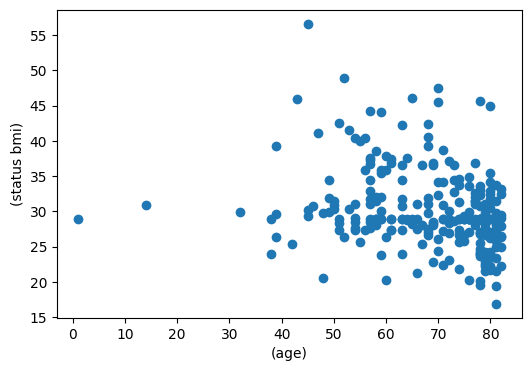

In [827]:
#Membuat scatter plot untuk data stroke berdasarkan usia dan BMI, serta menghilangkan outlier.
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(data_stroke['age'],data_stroke['bmi'])
ax.set_xlabel('(age)')
ax.set_ylabel('(status bmi)')
plt.show()

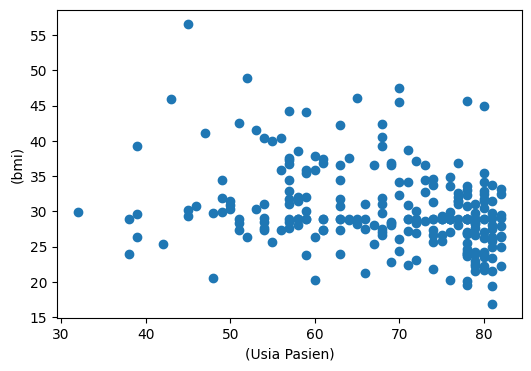

In [828]:
outlier_indices = np.where((data_stroke['age'] < 30) & (data_stroke['bmi'] > 25))
no_outliers = data_stroke.drop(outlier_indices[0])

fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['age'], no_outliers['bmi'])
ax_no_outliers.set_xlabel('(Usia Pasien)')
ax_no_outliers.set_ylabel('(bmi)')
plt.show()

In [829]:
#mengubah data menjadi angka menggunakan LabelEncoder.

from sklearn.preprocessing import LabelEncoder
pred_data = df
label_encoder = LabelEncoder()
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status','age_cat','glucose_cat','bmi_cat']

for col in categorical_cols:
  pred_data[col] = label_encoder.fit_transform(pred_data[col])
pred_data

id  gender  age  hypertension  heart_disease  ever_married  \
0      9046       1   67             0              1             1   
1     51676       0   61             0              0             1   
2     31112       1   80             0              1             1   
3     60182       0   49             0              0             1   
4      1665       0   79             1              0             1   
...     ...     ...  ...           ...            ...           ...   
5105  18234       0   80             1              0             1   
5106  44873       0   81             0              0             1   
5107  19723       0   35             0              0             1   
5108  37544       1   51             0              0             1   
5109  44679       0   44             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             2               1             228.69  36.6               1   
1             3               0             202.21  28.9               2   
2             2               0             105.92  32.5               2   
3             2               1             171.23  34.4               3   
4             3               0             174.12  24.0               2   
...         ...             ...                ...   ...             ...   
5105          2               1              83.75  28.9               2   
5106          3               1             125.20  40.0               2   
5107          3               0              82.99  30.6               2   
5108          2               0             166.29  25.6               1   
5109          0               1              85.28  26.2               0   

      stroke  age_cat  glucose_cat  bmi_cat  
0          1        4            2        3  
1          1        4            2        1  
2          1        4            0        3  
3          1        2            3        3  
4          1        4            3        0  
...      ...      ...          ...      ...  
5105       0        4            0        1  
5106       0        4            0        3  
5107       0        1            0        3  
5108       0        2            3        1  
5109       0        2            0        1  

[5110 rows x 15 columns]

In [830]:
#memisahkan variabel
x = df.drop(['stroke','id'], axis = 1)
y = df["stroke"]
x

gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   67             0              1             1          2   
1          0   61             0              0             1          3   
2          1   80             0              1             1          2   
3          0   49             0              0             1          2   
4          0   79             1              0             1          3   
...      ...  ...           ...            ...           ...        ...   
5105       0   80             1              0             1          2   
5106       0   81             0              0             1          3   
5107       0   35             0              0             1          3   
5108       1   51             0              0             1          2   
5109       0   44             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  age_cat  \
0                  1             228.69  36.6               1        4   
1                  0             202.21  28.9               2        4   
2                  0             105.92  32.5               2        4   
3                  1             171.23  34.4               3        2   
4                  0             174.12  24.0               2        4   
...              ...                ...   ...             ...      ...   
5105               1              83.75  28.9               2        4   
5106               1             125.20  40.0               2        4   
5107               0              82.99  30.6               2        1   
5108               0             166.29  25.6               1        2   
5109               1              85.28  26.2               0        2   

      glucose_cat  bmi_cat  
0               2        3  
1               2        1  
2               0        3  
3               3        3  
4               3        0  
...           ...      ...  
5105            0        1  
5106            0        3  
5107            0        3  
5108            3        1  
5109            0        1  

[5110 rows x 13 columns]

**DECISION TREE CLASSIFIER**

---



In [831]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt


In [832]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
sm = SMOTE(random_state=42)

In [833]:
x_train_res, y_train_res = smote.fit_resample(x_train_res, y_train_res)
print('Ukuran data dari x_train: ',x_train_res.shape)
print('Ukuran data dari y_train: ',y_train_res.shape)

Ukuran data dari x_train:  (6834, 13)
Ukuran data dari y_train:  (6834,)


In [834]:
#Membagi data menjadi data latih dan data uji dengan proporsi 70:30.
x_train, x_test, y_train, y_test = train_test_split(pred_data.drop(['stroke','id'], axis = 1), pred_data["stroke"],test_size=0.3,random_state=42)

print('Ukuran data dari x_train: ',x_train.shape)
print('Ukuran data dari y_train: ',y_train.shape)
print('Ukuran data dari x_test: ',x_test.shape)
print('Ukuran data dari y_test: ',y_test.shape)


Ukuran data dari x_train:  (3577, 13)
Ukuran data dari y_train:  (3577,)
Ukuran data dari x_test:  (1533, 13)
Ukuran data dari y_test:  (1533,)


In [835]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [837]:
#Menggunakan gini sebagai kriteria untuk pemisahan.
#Tidak ada batasan kedalaman, sehingga pohon dapat menjadi sangat dalam dan kompleks.
#Tanpa batasan kedalaman dan menggunakan Gini sebagai kriteria pemisahan, model ini mungkin lebih kompleks dan cenderung overfitting jika tidak ada batasan lain yang ditetapkan.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_gini = DecisionTreeClassifier()
clf_gini= clf_gini.fit(x_train,y_train)
y_pred = clf_gini.predict(x_test)


In [836]:
#melatih model menggunkan kriteria Gini
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf_gini = clf_gini.fit(x_train_res,y_train_res)
y_pred = clf_gini.predict(x_test)

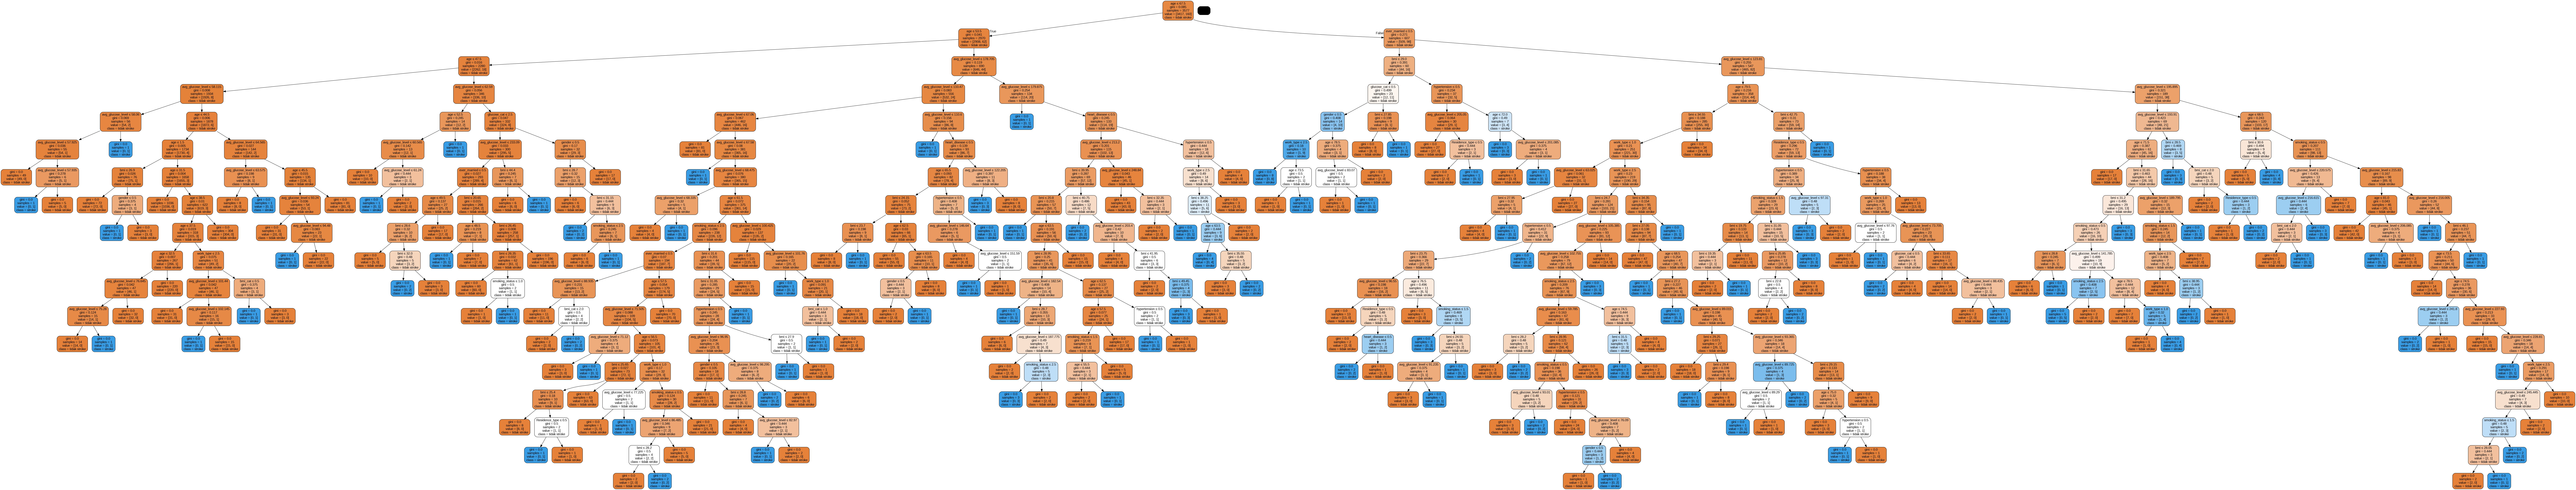

In [838]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

feature_cols = x.columns

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['tidak stroke','stroke'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('prediksi stroke')
Image(graph.create_png())

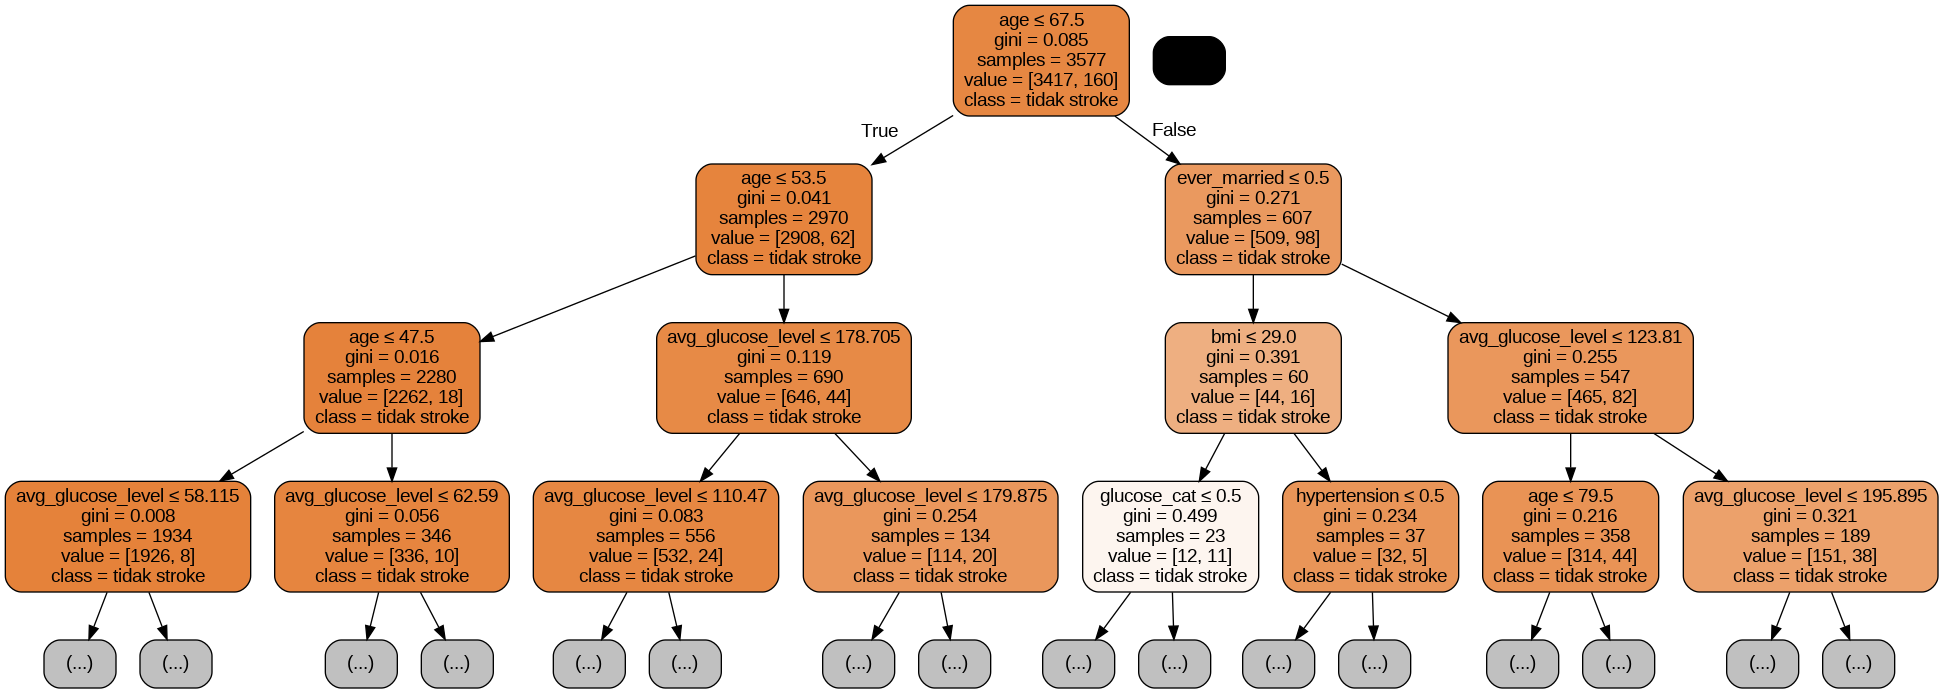

In [839]:
# menggunakan max dept = 3, overvitting
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus


feature_cols = x.columns

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
                filled=True, rounded=True,
                max_depth=3,
                special_characters=True,feature_names = feature_cols,class_names=['tidak stroke','stroke'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('prediksi stroke')
Image(graph.create_png())

In [840]:
# Mendapatkan pentingnya fitur
importances1 = clf_gini.feature_importances_

In [841]:
#Menampilkan pentingnya fitur untuk model
features = x_train.columns
indices1 = np.argsort(importances1)[::-1]
plt.figure(figsize=(20, 5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

Text(0, 0.5, 'Importance')

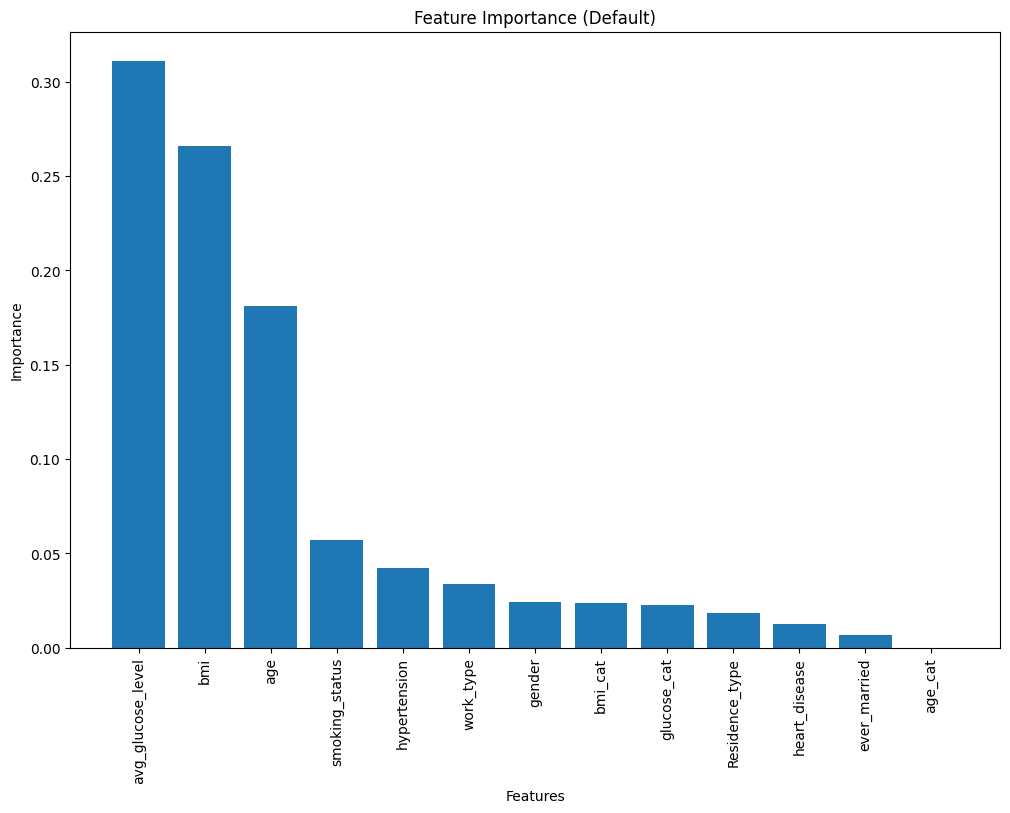

In [842]:
# plt.subplot(1, 2, 1)
plt.figure(figsize=(12, 8))

plt.title("Feature Importance (Default)")
plt.bar(range(x_train.shape[1]), importances1[indices1], align="center")
plt.xticks(range(x_train.shape[1]), features[indices1], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")


In [843]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

clf_gini = DecisionTreeClassifier()
clf_gini.fit(x_train, y_train)

y_pred1 = clf_gini.predict(x_test)

dt_conf1 = confusion_matrix(y_test, y_pred1)
dt_report1 = classification_report(y_test, y_pred1)
dt_acc1 = round(accuracy_score(y_test, y_pred1) * 100, 2)


print(f"Confusion Matrix: \n{dt_conf1}")
print(f"\nClassification Report: \n{dt_report1}")
print(f"Accuracy: {dt_acc1}%\n")


Confusion Matrix: 
[[1369   75]
 [  71   18]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.19      0.20      0.20        89

    accuracy                           0.90      1533
   macro avg       0.57      0.58      0.57      1533
weighted avg       0.91      0.90      0.91      1533

Accuracy: 90.48%



**ENTROPY**

In [844]:
clf_entropy= DecisionTreeClassifier(random_state=42)
clf_entropy.fit(x_train, y_train)
y_pred2 = clf_entropy.predict(x_test)

In [845]:
#Menggunakan entropy sebagai kriteria untuk pemisahan.
#Dibatasi hingga kedalaman 3, yang membuat model lebih sederhana dan membantu mencegah overfitting.
#Dengan menggunakan entropy dan membatasi kedalaman pohon hingga 3, model ini mencoba untuk lebih sederhana dan mungkin lebih baik dalam generalisasi pada data baru, namun bisa jadi kurang akurat pada data pelatihan.

clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_entropy = clf_entropy.fit(x_train_res,y_train_res)
y_pred = clf_entropy.predict(x_test)


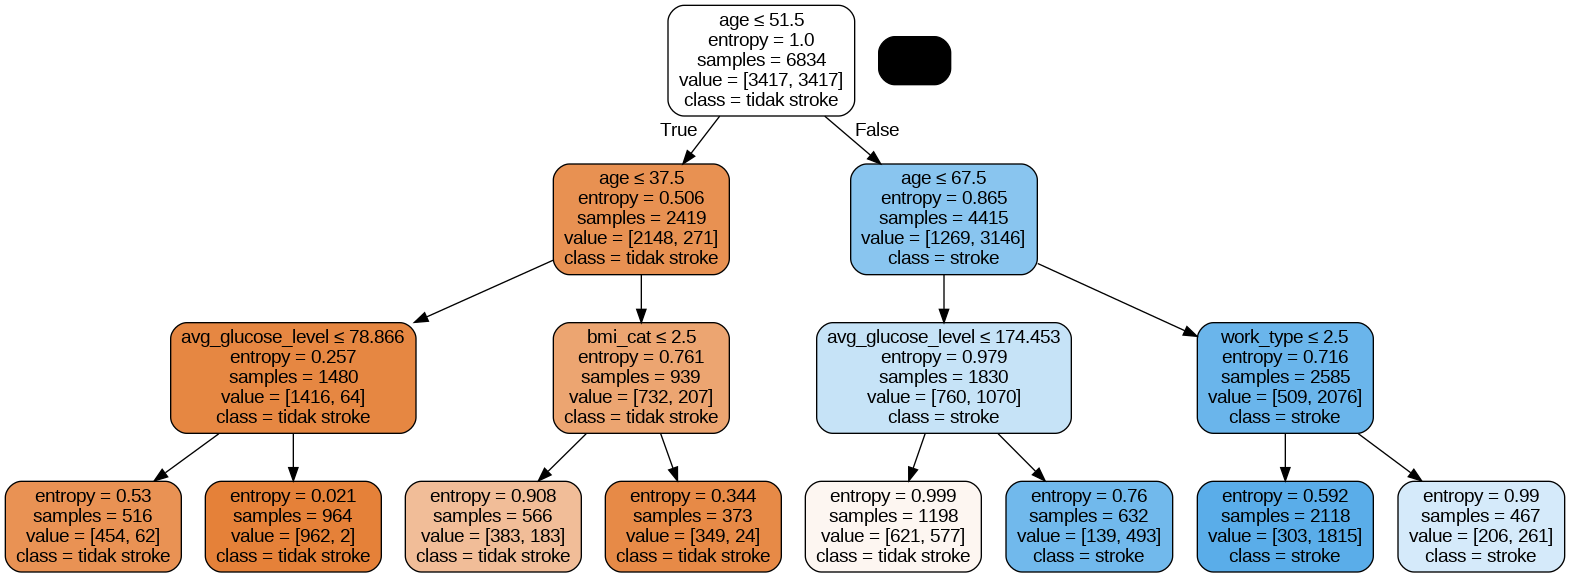

In [846]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus


feature_cols = x.columns

dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['tidak stroke','stroke'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('prediksi stroke')
Image(graph.create_png())

In [847]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Kode 2: DecisionTreeClassifier dengan criterion="entropy" dan max_depth=3
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_entropy.fit(x_train_res, y_train_res)

y_pred2 = clf_entropy.predict(x_test)

dt_conf2 = confusion_matrix(y_test, y_pred2)
dt_report2 = classification_report(y_test, y_pred2)
dt_acc2 = round(accuracy_score(y_test, y_pred2) * 100, 2)

print(f"Model 2 (Entropy, Max Depth=3)")
print(f"Confusion Matrix: \n{dt_conf2}")
print(f"\nClassification Report: \n{dt_report2}")
print(f"Accuracy: {dt_acc2}%\n")


Model 2 (Entropy, Max Depth=3)
Confusion Matrix: 
[[1180  264]
 [  32   57]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1444
           1       0.18      0.64      0.28        89

    accuracy                           0.81      1533
   macro avg       0.58      0.73      0.58      1533
weighted avg       0.93      0.81      0.85      1533

Accuracy: 80.69%



In [848]:
importances2 = clf_entropy.feature_importances_
features = x.columns
indices2 = np.argsort(importances2)[::-1]


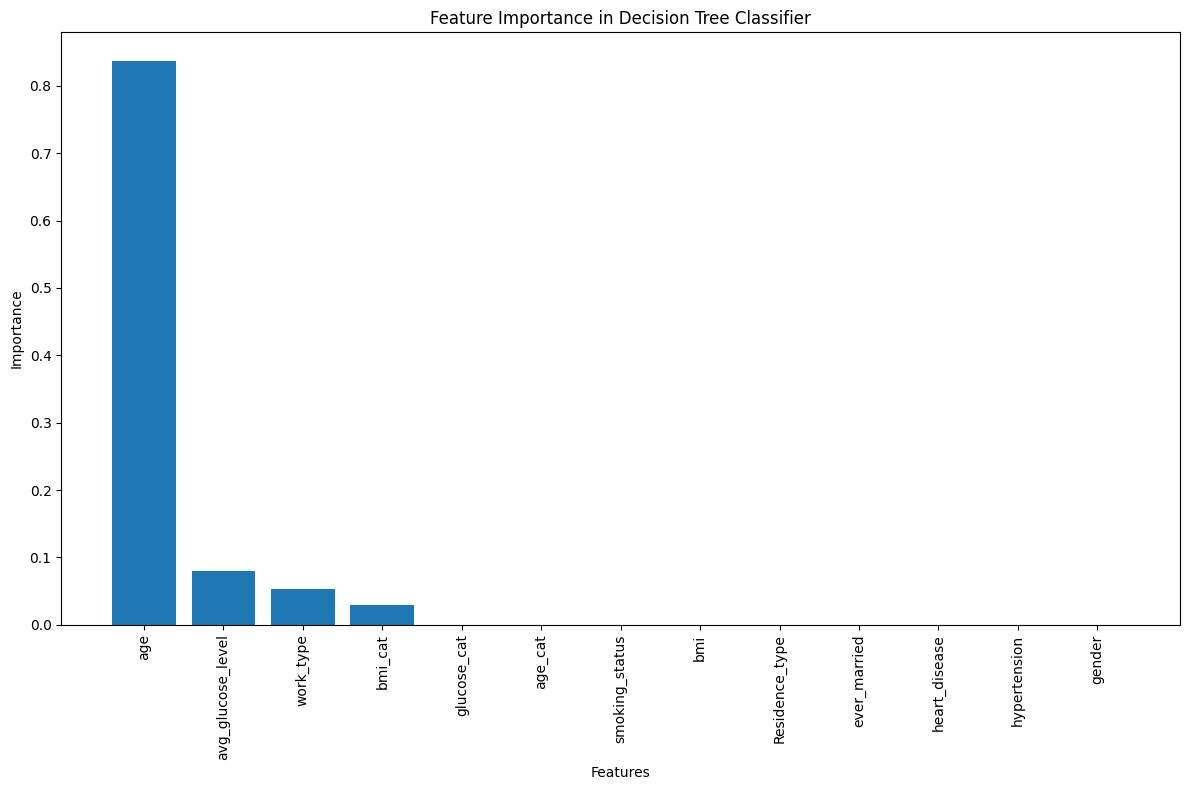

In [849]:
#Menghitung dan menampilkan pentingnya fitur dalam model Decision Tree dengan menggunakan feature_importances_.
#Fitur yang paling penting ditampilkan dengan urutan menurun.

importances = clf_entropy.feature_importances_
features = x.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Decision Tree Classifier")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


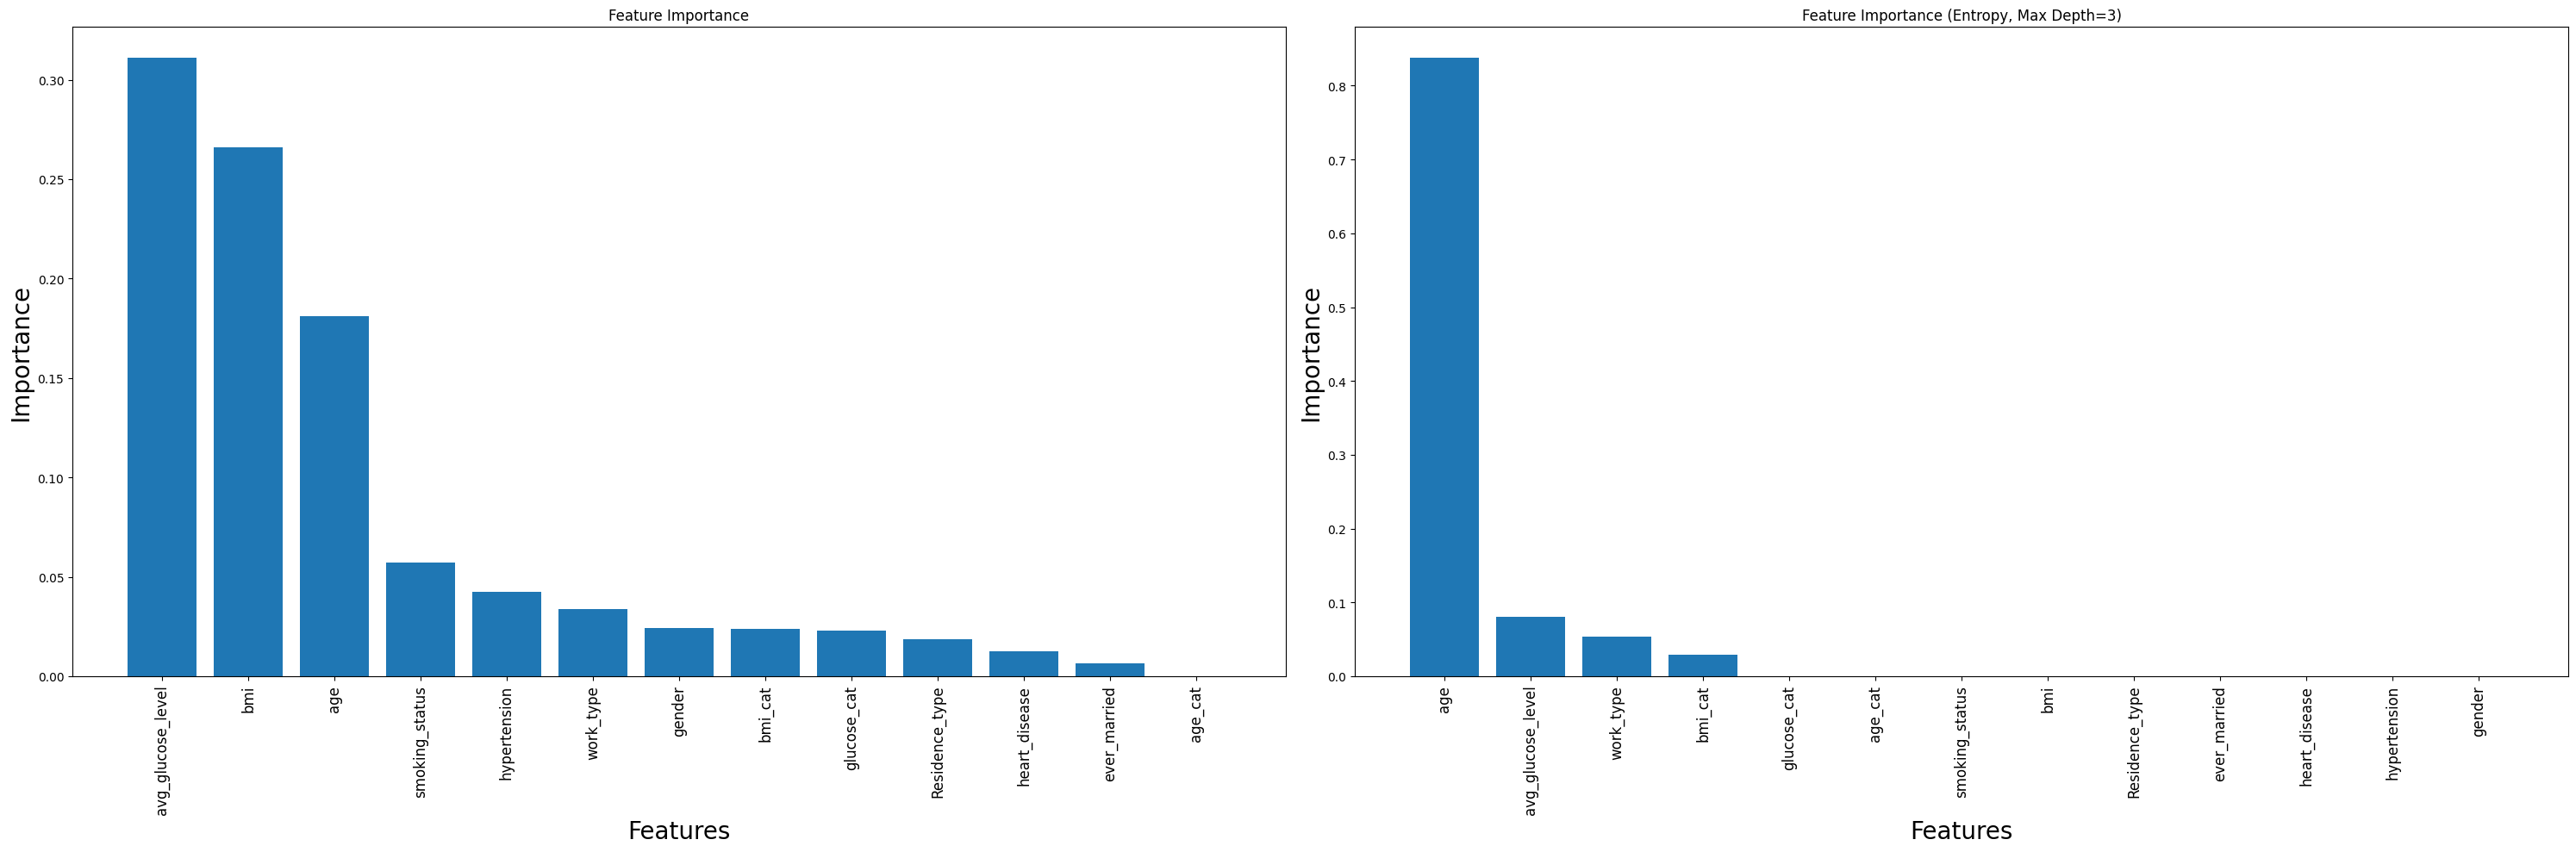

In [850]:
plt.figure(figsize=(30, 10))

# gini
plt.subplot(1, 2, 1)
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances1[indices1], align="center")
plt.xticks(range(x_train.shape[1]), features[indices1], rotation=90, fontsize=12)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Importance", fontsize=20)

# Entropy
plt.subplot(1, 2, 2)
plt.title("Feature Importance (Entropy, Max Depth=3)")
plt.bar(range(x_train.shape[1]), importances2[indices2], align="center")
plt.xticks(range(x_train.shape[1]), features[indices2], rotation=90, fontsize=12)
plt.xlabel("Features", fontsize=20)
plt.ylabel("Importance", fontsize=20)

plt.tight_layout()
plt.show()

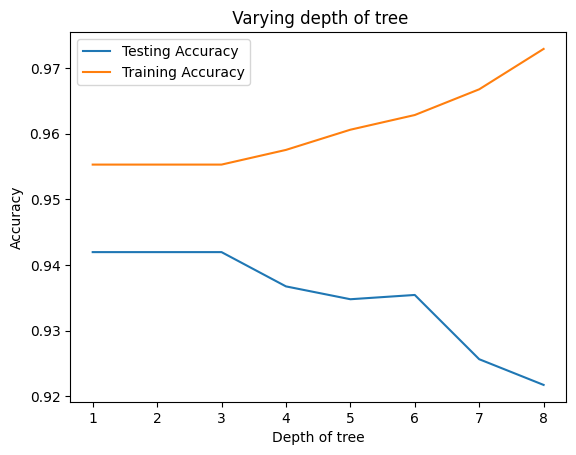

In [851]:
# Setup arrays to store train and test accuracies
train_accuracy = []
test_accuracy = []

# Loop over different values of k
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)

# Generate plot
plt.title(' Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()


TAMBAHAN